In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from collections import Counter
import joblib

In [2]:
def pca_params(X):
    mu = np.mean(X,axis=0)
    Z = X-mu
    C = np.cov(Z,rowvar=False)
    [lam, V] = np.linalg.eigh(C)
    lam = np.flipud(lam)
    V = np.flipud(V.T)
    P = np.dot(Z,V.T)
    return mu,P,V,lam

In [28]:
def pc_cords(X, mu, V):
    z = X - mu
    p = np.dot(z, V.T)
    return p

In [9]:
def scatter_plot(P, T):
  '''
  P contains 2D vectors
  '''
  opacity=0.8
  cols=np.zeros((len(T),4))     
  cols[T=='happy']=[1,0,0,opacity] # red
  cols[T=='sad']=[0,1,0,opacity]  #green
  cols[T=='neutral']=[0,0,1,opacity] #blue
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, facecolor='black')
  randomorder=np.arange(len(T))
  ax.scatter(P[randomorder,1],P[randomorder,0],s=50,linewidths=0,facecolors=cols[randomorder,:],marker="o");
  ax.set_aspect('equal')

  plt.gca().invert_yaxis()
  plt.show()

In [3]:
# Load dataset from csv file
CSV_FILE = '../scripts/train-neighbors_and_inner_mouth_angles.csv'
allrows = np.loadtxt(CSV_FILE, delimiter=',', dtype='str')
allrows.shape

(574, 139)

In [4]:
cols = allrows.shape[1] - 1
X = allrows[:, :cols].astype('float')
T = allrows[:, cols]

In [5]:
# Split training and testing set
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=111)

In [21]:
# KNN on original feature vectors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, T_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)
metrics.accuracy_score(T_test, pred)

0.8608695652173913

In [23]:
Counter(zip(pred, T_test))

Counter({('sad', 'sad'): 30,
         ('happy', 'happy'): 37,
         ('sad', 'neutral'): 2,
         ('happy', 'neutral'): 2,
         ('neutral', 'neutral'): 32,
         ('neutral', 'sad'): 10,
         ('neutral', 'happy'): 2})

In [31]:
# Search for the best K
def search_k(X_train, T_train, X_test, T_test, klist=[]):
    max_accu = 0
    best_k = 0
    for k in klist:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, T_train)
        pred = knn.predict(X_test)
        accu = metrics.accuracy_score(T_test, pred)
        if accu > max_accu:
            max_accu = accu
            best_k = k
    return best_k, max_accu

In [32]:
search_k(X_train, T_train, X_test, T_test, klist=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

(7, 0.8608695652173913)

In [24]:
# KNN on dimension reduced P, 30 dimensions

In [25]:
# PCA parameters
mu, P, V, lam = pca_params(X_train)

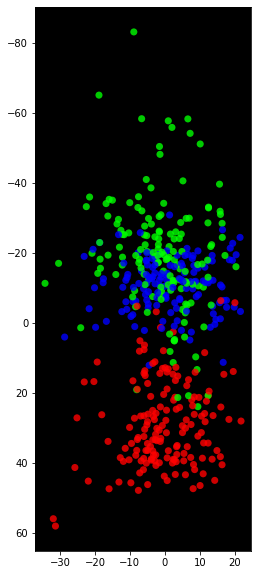

In [26]:
# Plot 2-D point clouds
P2=P[:,0:2]
V2=V[0:2,:]
scatter_plot(P2, T_train)

In [27]:
P30 = P[:,0:30]
V30 = V[0:30,:]

In [29]:
P30_test = pc_cords(X_test, mu, V30)

In [33]:
search_k(P30, T_train, P30_test, T_test, klist=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

(7, 0.8521739130434782)

In [35]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(P30, T_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [36]:
pred = knn.predict(P30_test)
metrics.accuracy_score(T_test, pred)

0.8521739130434782

In [37]:
Counter(zip(pred, T_test))

Counter({('sad', 'sad'): 30,
         ('happy', 'happy'): 37,
         ('sad', 'neutral'): 3,
         ('happy', 'neutral'): 2,
         ('neutral', 'neutral'): 31,
         ('neutral', 'sad'): 10,
         ('neutral', 'happy'): 2})